# Diffraction by a thick slit 

In [1]:
from diffractio import np
from diffractio import degrees, um

In [2]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [3]:

from diffractio.vector_fields_X import Vector_field_X
from diffractio.vector_fields_XZ import Vector_field_XZ

In [4]:
from py_pol.jones_vector import Jones_vector

## Definición de experimento

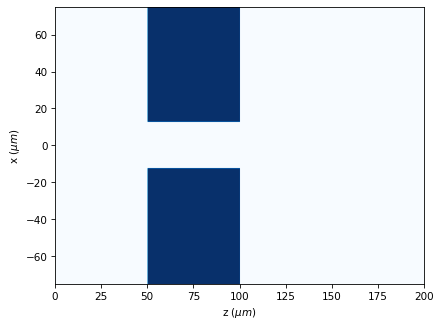

In [5]:
# definition of scheme
x0 = np.linspace(-75*um, 75*um, 1024)
z0 = np.linspace(0*um, 200*um, 512)
wavelength = 10*um

# definition of the source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

# definition of the mask
u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u_xz.incident_field(u0)
u_xz.slit(r0=(0, 50*um), aperture = 25*um, depth = 50*um, refractive_index = 1.5+2j)

# draw the mask
u_xz.draw_refractive_index(scale='scaled')

## Vector calculation with FPWPM

In [6]:
# Definition of the polarization state of the incident field.
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+0.707]   
[+0.707]   



In [7]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)


In [8]:
EH_xz.FP_WPM(has_edges=False,  verbose=False)

<Figure size 480x360 with 0 Axes>

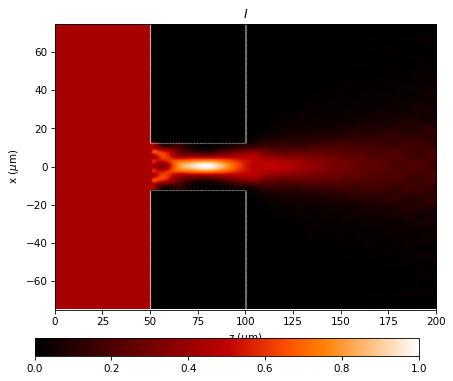

In [9]:
EH_xz.draw('intensity', logarithm=0, draw_borders=True, scale='scaled')

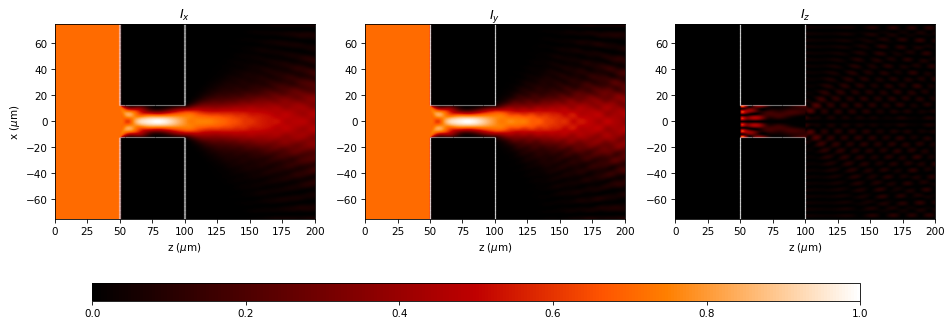

In [10]:
EH_xz.draw('intensities', logarithm=1e1, draw_borders=True, scale='scaled')


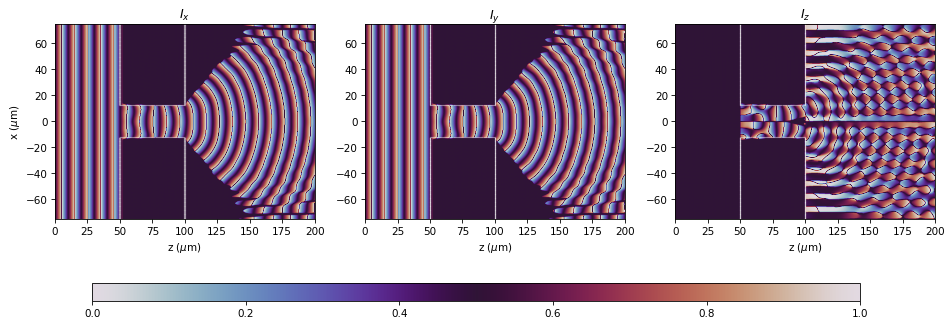

In [11]:
EH_xz.draw('phases', percentage_intensity=.001, draw_borders=True, scale='scaled')

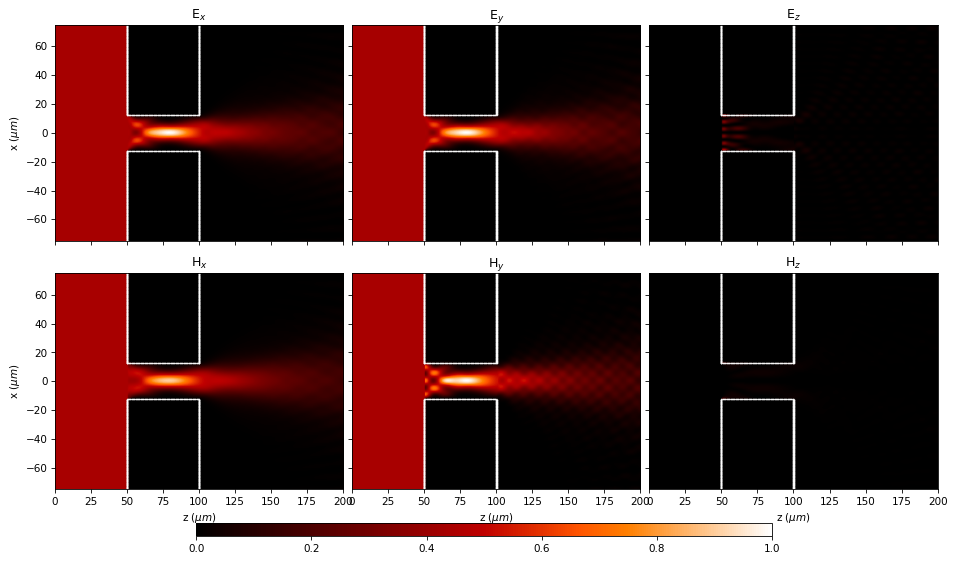

In [24]:
EH_xz.draw('E2H2', logarithm=False, normalize= False, cut_value=None, 
           draw_borders=True, scale='scaled', color='w.', ms=.5)

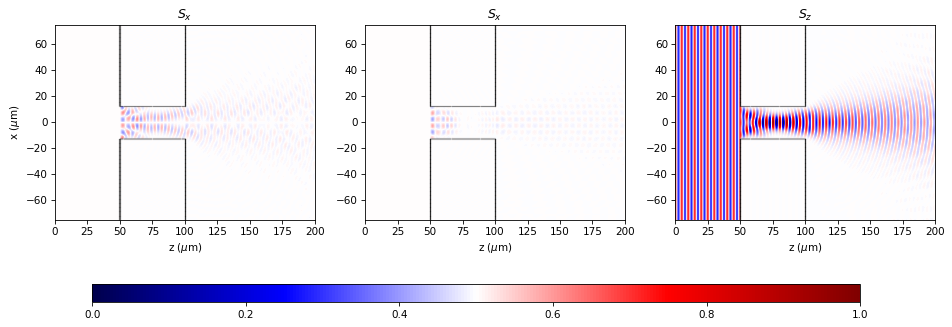

In [14]:
P_vector = EH_xz.draw('poynting_vector', color='k.')

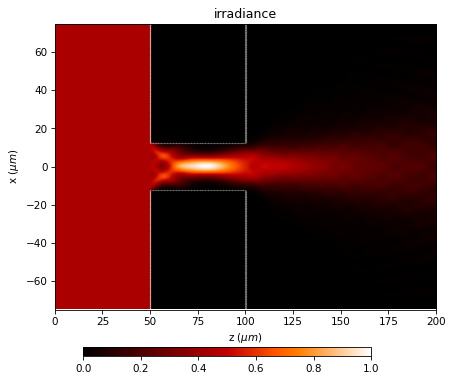

In [16]:
P_vector = EH_xz.draw('irradiance')

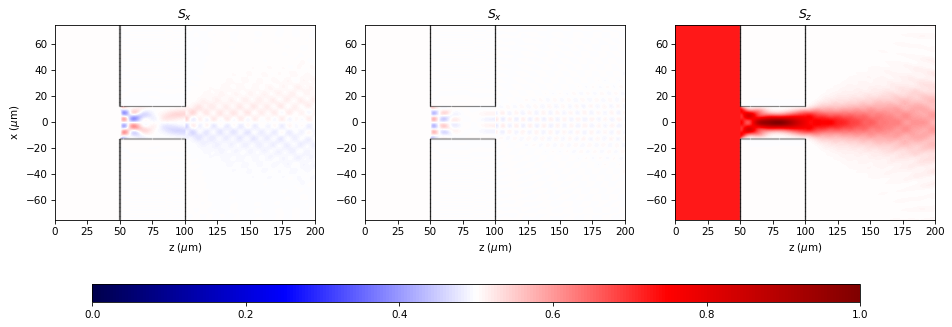

In [17]:
P_vector = EH_xz.draw('poynting_vector_averaged', color='k.')

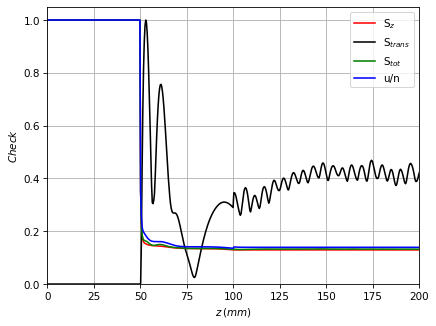

In [18]:
energy = EH_xz.check_energy()
